In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the original scores from the pickle files
import pickle
save_path = '/content/drive/My Drive/NLP271b/'
with open(save_path+'original_aesthetic_scores_np.pkl', 'rb') as f:
    aesthetic_scores = pickle.load(f)

with open(save_path+'original_hps_scores_np.pkl', 'rb') as f:
    hps_scores = pickle.load(f)

In [ ]:
def combine_scores(hps_scores, aesthetic_scores, w_hps, w_aesthetic):
    combined_scores = [w_hps * hps + w_aesthetic * (aesthetic / 10.0) for hps, aesthetic in zip(hps_scores, aesthetic_scores)]
    return combined_scores

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def combine_scores_old(hps_scores, aesthetic_scores):
    scaler = MinMaxScaler()

    # Reshape the input arrays to 2D
    hps_scores = hps_scores.reshape(-1, 1)
    aesthetic_scores = aesthetic_scores.reshape(-1, 1)

    # Normalize HPS scores
    normalized_hps = scaler.fit_transform(hps_scores)

    # Normalize aesthetic scores
    normalized_aesthetic = scaler.fit_transform(aesthetic_scores)

    # Take the mean of normalized HPS scores
    mean_normalized_hps = np.mean(normalized_hps)

    # Take the mean of normalized aesthetic scores
    mean_normalized_aesthetic = np.mean(normalized_aesthetic)

    # Combine the means using a weighted average or other method if needed
    # In this example, I'll use equal weights (0.5 for each)
    combined_score = 0.5 * mean_normalized_hps + 0.5 * mean_normalized_aesthetic

    return combined_score

In [ ]:
combined_scores_old =  combine_scores_old(hps_scores, aesthetic_scores)

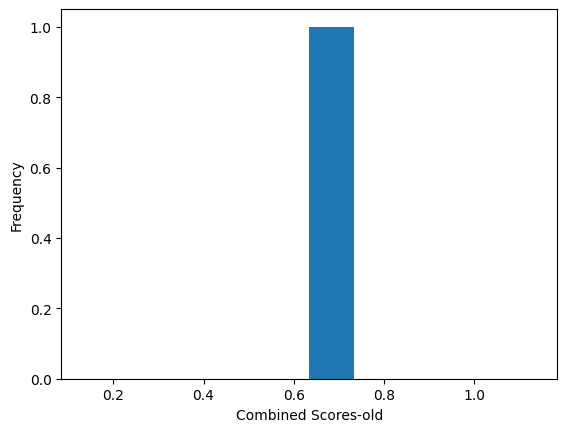

In [ ]:
# plot combined scores by old method
plt.hist(combined_scores_old)
plt.xlabel("Combined Scores-old")
plt.ylabel('Frequency')
plt.show()

Mean value of Combined scores with weight hps:  0.5 weight aesthetic:  0.5 : 0.4299


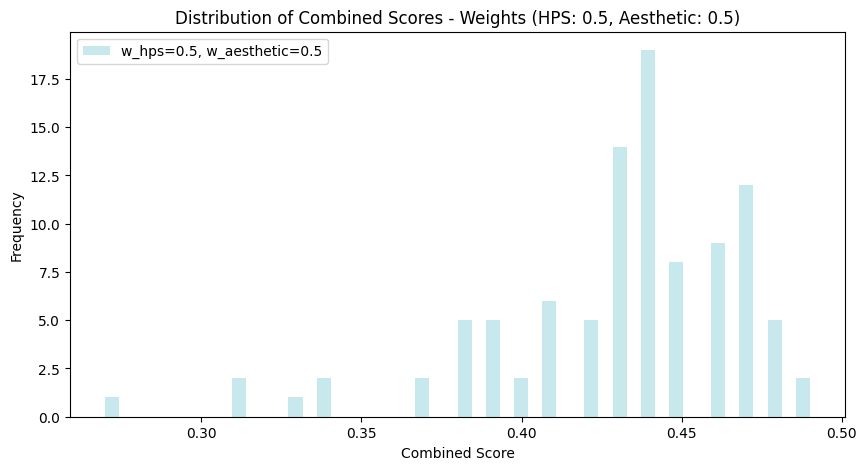

Mean value of Combined scores with weight hps:  0.6 weight aesthetic:  0.4 : 0.3966000000000001


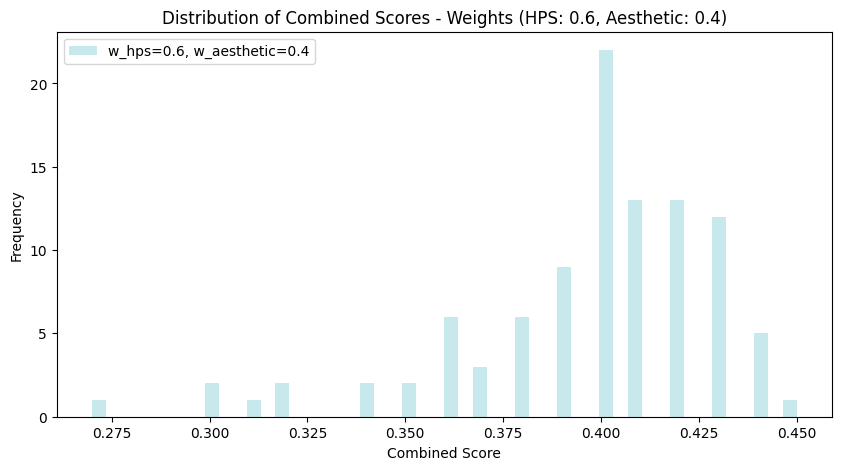

Mean value of Combined scores with weight hps:  0.7 weight aesthetic:  0.3 : 0.3629


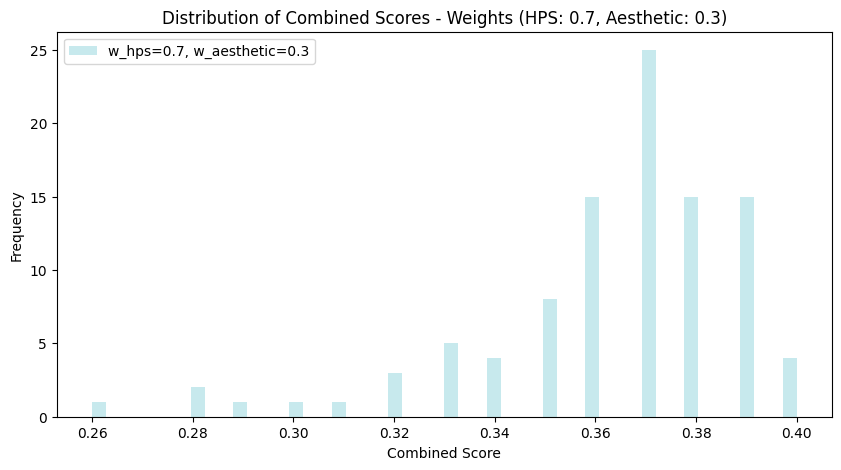

Mean value of Combined scores with weight hps:  0.8 weight aesthetic:  0.2 : 0.3296


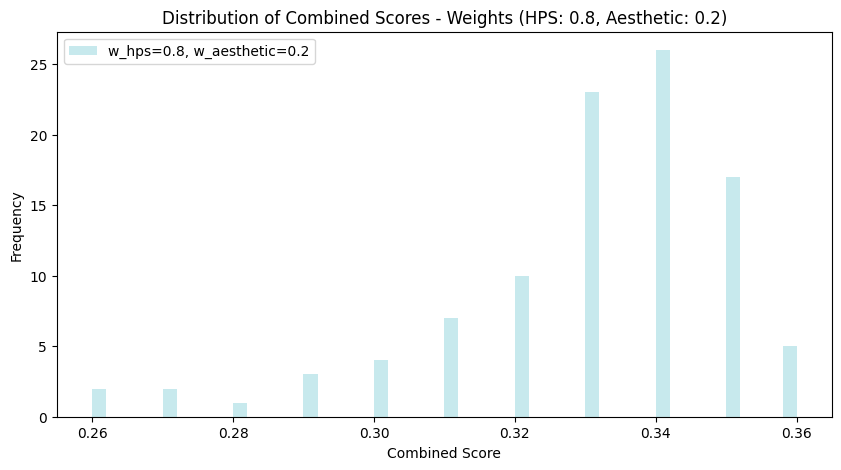

In [ ]:
# Plotting combined scores with different weights
combined_scores_grouped = []
weights = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
for w_hps, w_aesthetic in weights:
    combined_scores = combine_scores(hps_scores, aesthetic_scores, w_hps, w_aesthetic)
    combined_scores_rounded = np.round(combined_scores, 2)
    print("Mean value of Combined scores with weight hps: ",w_hps, "weight aesthetic: ", w_aesthetic, ":", np.mean(combined_scores_rounded) )
    combined_scores_grouped.append(combined_scores_rounded)

    # Plotting the scores distribution for the current weights
    plt.figure(figsize=(10, 5))
    plt.hist(combined_scores_rounded, bins=50, alpha=0.7, color='powderblue', label=f'w_hps={w_hps}, w_aesthetic={w_aesthetic}')
    plt.xlabel('Combined Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Combined Scores - Weights (HPS: {w_hps}, Aesthetic: {w_aesthetic})')
    plt.legend()
    plt.show()

#### standard deviations of each combined scores
- higher standard deviation --> higher spread --> more diverse distributions of combined scores

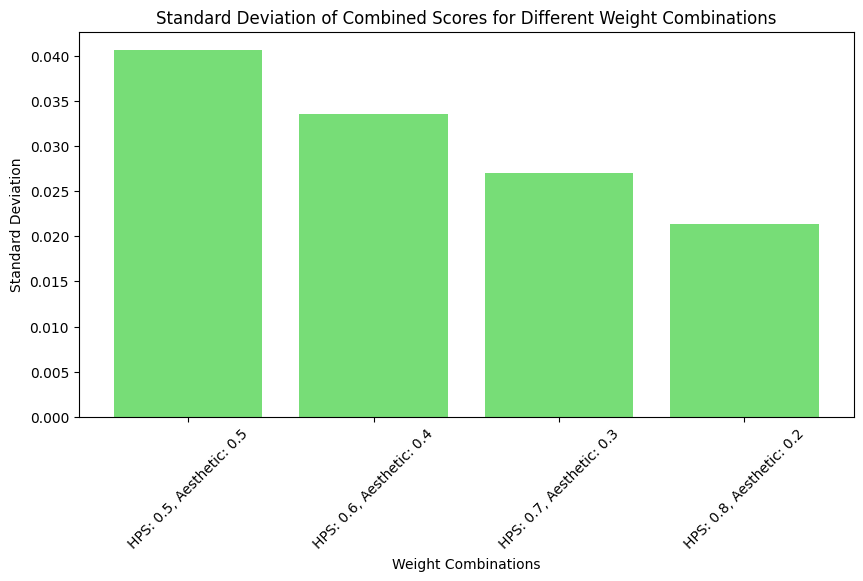

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting a bar chart with different weights and their standard deviations
std_devs = []
weight_labels = []

weights = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
for w_hps, w_aesthetic in weights:
    combined_scores = combine_scores(hps_scores, aesthetic_scores, w_hps, w_aesthetic)
    combined_scores_rounded = np.round(combined_scores, 2)
    std_dev = np.std(combined_scores_rounded)
    std_devs.append(std_dev)
    weight_labels.append(f"HPS: {w_hps}, Aesthetic: {w_aesthetic}")

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(weight_labels, std_devs, color='#77dd77')
plt.xlabel('Weight Combinations')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Combined Scores for Different Weight Combinations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(std_devs)

[0.040632376253426285, 0.033502835700877615, 0.027029428406830956, 0.021350409832132027]


#### ANOVA test
- if at least one group has difference in variance, ANOVA test is valid

In [ ]:
import numpy as np
from scipy import stats

# Example weight combinations
weights = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

# Collecting combined scores for each weight combination
combined_scores_groups = [combine_scores(hps_scores, aesthetic_scores, w_hps, w_aesthetic) for w_hps, w_aesthetic in weights]

# Perform ANOVA
F_statistic, p_value = stats.f_oneway(*combined_scores_groups)
print(f"F-statistic: {F_statistic}, p-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The test result suggests the groups do not have the same variances.")
else:
    print("The test result suggests there is no significant difference in variances between the groups.")

F-statistic: 188.48165646996554, p-value: 6.482064510598818e-76
The test result suggests the groups do not have the same variances.


#### Tukey HSD test
- to test which specific groups have different means in combined scores

In [ ]:
# tukey HSD test
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

all_scores = np.concatenate(combined_scores_groups)
# Create group labels
group_labels = []
for i, weight in enumerate(weights):
    group_labels.extend([f"w_hps={weight[0]}, w_aesthetic={weight[1]}"] * len(combined_scores_groups[i]))

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------------------------
w_hps=0.5, w_aesthetic=0.5 w_hps=0.6, w_aesthetic=0.4  -0.0334   0.0 -0.0449  -0.022   True
w_hps=0.5, w_aesthetic=0.5 w_hps=0.7, w_aesthetic=0.3  -0.0669   0.0 -0.0783 -0.0554   True
w_hps=0.5, w_aesthetic=0.5 w_hps=0.8, w_aesthetic=0.2  -0.1003   0.0 -0.1118 -0.0888   True
w_hps=0.6, w_aesthetic=0.4 w_hps=0.7, w_aesthetic=0.3  -0.0334   0.0 -0.0449  -0.022   True
w_hps=0.6, w_aesthetic=0.4 w_hps=0.8, w_aesthetic=0.2  -0.0669   0.0 -0.0783 -0.0554   True
w_hps=0.7, w_aesthetic=0.3 w_hps=0.8, w_aesthetic=0.2  -0.0334   0.0 -0.0449  -0.022   True
-------------------------------------------------------------------------------------------


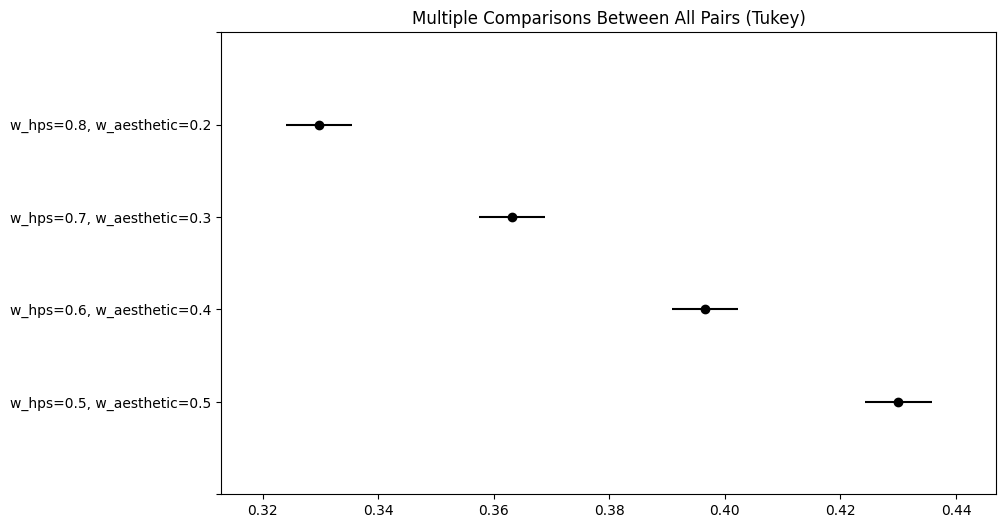

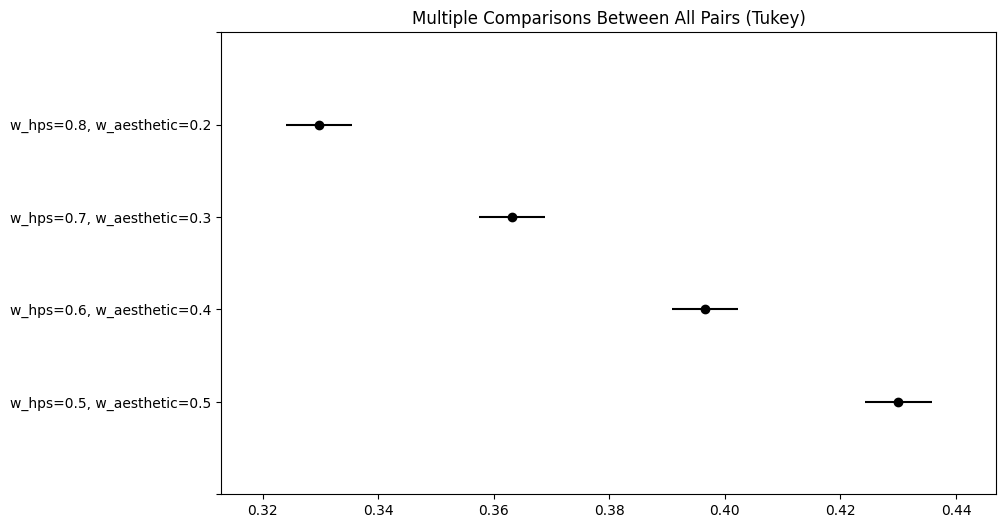

In [ ]:
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=all_scores, groups=group_labels, alpha=0.05)

# Print the results
print(tukey_results)

# Plot the results
tukey_results.plot_simultaneous()
# all weight combinations have different means in combined scores

#### Levene Test:
- to know which specific group has significant different variance (different spread in combined scores)

In [ ]:
# pairwise comparisons for varaince--levene's tests
from itertools import combinations
from scipy.stats import levene
import numpy as np

# Assuming combined_scores_groups is a list of arrays, each array containing the scores for a group
weights = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
group_names = [f"w_hps={weight[0]}, w_aesthetic={weight[1]}" for weight in weights]
pairwise_comparisons = list(combinations(range(len(combined_scores_groups)), 2))

# Calculate the Bonferroni corrected alpha level
num_comparisons = len(pairwise_comparisons)
alpha = 0.05
bonferroni_alpha = alpha / num_comparisons

# Perform pairwise Levene's tests with Bonferroni correction
print(f"Using a Bonferroni corrected alpha level of {bonferroni_alpha}")
for (i, j) in pairwise_comparisons:
    stat, p_value = levene(combined_scores_groups[i], combined_scores_groups[j])
    print(f"Levene's test between {group_names[i]} and {group_names[j]}: Statistic={stat}, P-value={p_value}")
    if p_value < bonferroni_alpha:
        print(f"The difference in variances between {group_names[i]} and {group_names[j]} is statistically significant after Bonferroni correction.")
    else:
        print(f"No significant difference in variances between {group_names[i]} and {group_names[j]} after Bonferroni correction.")
    print("\n")

Using a Bonferroni corrected alpha level of 0.008333333333333333
Levene's test between w_hps=0.5, w_aesthetic=0.5 and w_hps=0.6, w_aesthetic=0.4: Statistic=1.4725590961357424, P-value=0.226387949430492
No significant difference in variances between w_hps=0.5, w_aesthetic=0.5 and w_hps=0.6, w_aesthetic=0.4 after Bonferroni correction.


Levene's test between w_hps=0.5, w_aesthetic=0.5 and w_hps=0.7, w_aesthetic=0.3: Statistic=6.226320969009652, P-value=0.01340388013907053
No significant difference in variances between w_hps=0.5, w_aesthetic=0.5 and w_hps=0.7, w_aesthetic=0.3 after Bonferroni correction.


Levene's test between w_hps=0.5, w_aesthetic=0.5 and w_hps=0.8, w_aesthetic=0.2: Statistic=14.250176056018553, P-value=0.0002114809637062622
The difference in variances between w_hps=0.5, w_aesthetic=0.5 and w_hps=0.8, w_aesthetic=0.2 is statistically significant after Bonferroni correction.


Levene's test between w_hps=0.6, w_aesthetic=0.4 and w_hps=0.7, w_aesthetic=0.3: Statistic=1.

groups that have significance difference in variance:
- w_hps=0.5, w_aesthetic=0.5 and w_hps=0.8, w_aesthetic=0.2
- w_hps=0.6, w_aesthetic=0.4 and w_hps=0.8, w_aesthetic=0.2

#### Misaligned & Aligned data

In [ ]:
import pickle
save_path = '/content/drive/My Drive/NLP271b/'
with open(save_path+'misaligned_hps_scores_np.pkl', 'rb') as f:
   misaligned_hps_scores = pickle.load(f)

with open(save_path+'misaligned_aesthetic_scores_np.pkl', 'rb') as f:
    misaligned_aesthetic_scores = pickle.load(f)

In [ ]:
def plot_misaligned_combine_scores(weight_hps, weight_aesthetic):
    misaligned_combined_scores = combine_scores(misaligned_hps_scores, misaligned_aesthetic_scores, w_hps= weight_hps, w_aesthetic= weight_aesthetic)
    misaligned_combined_scores_rounded = np.round(misaligned_combined_scores, 2)

    # And if you want to plot the distribution of these misaligned combined scores:
    plt.figure(figsize=(10, 5))
    plt.hist(misaligned_combined_scores_rounded, bins=50, alpha=0.7, color='salmon', label='Misaligned Data')
    plt.xlabel('Combined Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Combined Scores - Misaligned Data - Weights (HPS: {weight_hps}, Aesthetic: {weight_aesthetic})')
    plt.legend()
    plt.show()

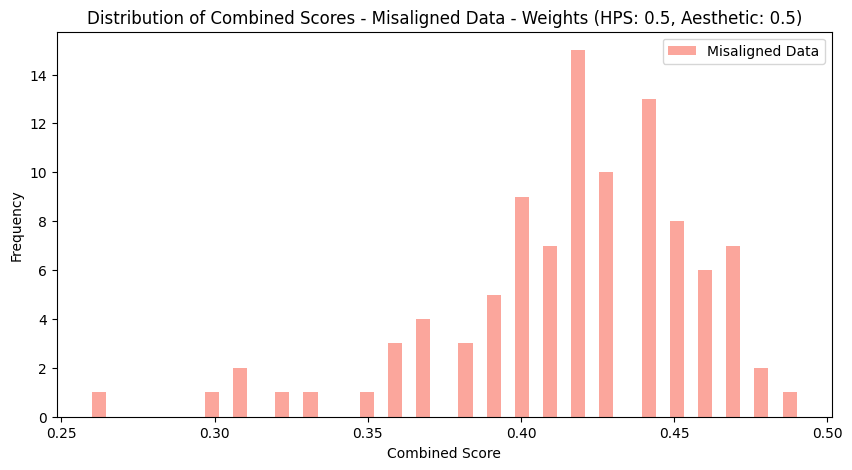

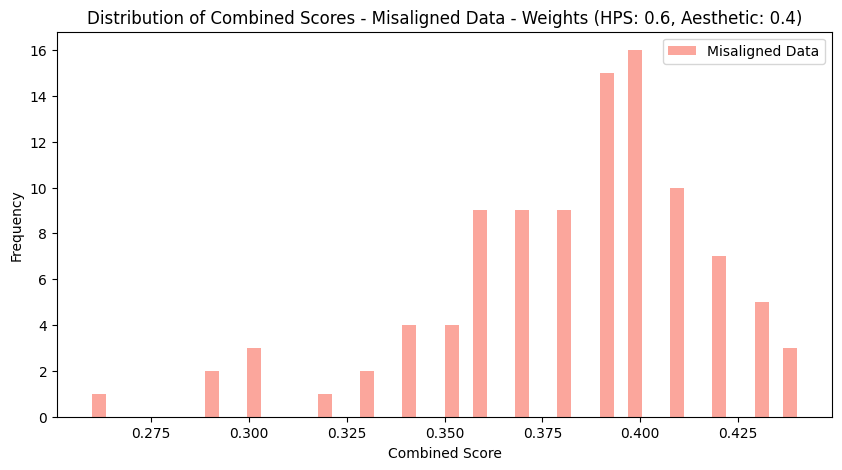

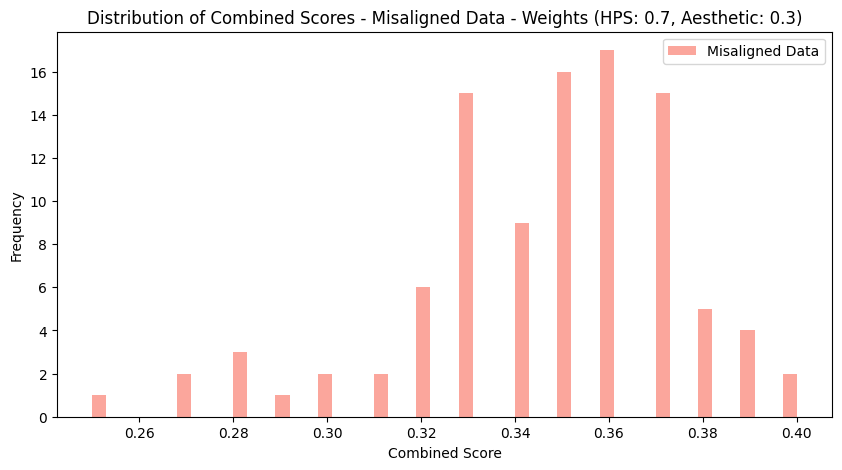

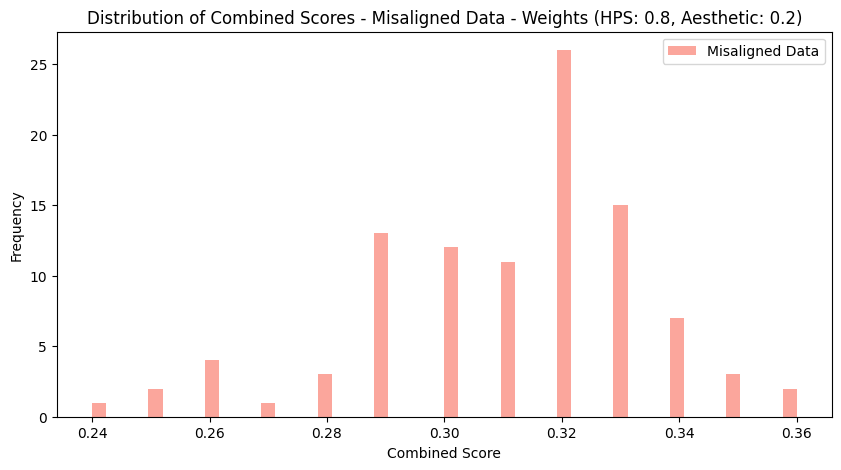

In [ ]:
weights = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
for weight in weights:
  weight_hps = weight[0]
  weight_aesthetic = weight[1]
  plot_misaligned_combine_scores(weight_hps, weight_aesthetic)

In [ ]:
# two sample t-test on each weight combinations
# goal: compare whether actual difference in aligned & misaligned data for different weight combinations
# Perform two-sample t-test
def two_sample_t_test(aligned_scores, misaligned_scores, weight_hps, weight_aesthetic):
    t_stat, p_value_two_tailed = stats.ttest_ind(aligned_scores, misaligned_scores, equal_var=False)

    # For a one-tailed test, divide the p-value by 2
    p_value_one_tailed = p_value_two_tailed / 2

    # The t-statistic should be positive for the alternative hypothesis to be true
    print(f"Two sample t test - Weights (HPS: {weight_hps}, Aesthetic: {weight_aesthetic})")
    if p_value_one_tailed < 0.05 and t_stat > 0:
        print("Reject the null hypothesis - the aligned combined score is statistically higher than the misaligned combined score.")
    else:
        print("Fail to reject the null hypothesis - we do not have sufficient evidence to say that the aligned combined score is higher.")

    # Output the results
    print(f"Mean of aligned combined scores: {np.mean(aligned_scores)}")
    print(f"Mean of misaligned combined scores: {np.mean(misaligned_scores)}")
    print(f"T-statistic: {t_stat}")
    print(f"P-value (one-tailed): {p_value_one_tailed}")
    print("\n")

In [ ]:
weights = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
for weight in weights:
  weight_hps = weight[0]
  weight_aesthetic = weight[1]
  misaligned_combined_scores = combine_scores(misaligned_hps_scores, misaligned_aesthetic_scores, w_hps= weight_hps, w_aesthetic= weight_aesthetic)
  aligned_combined_scores = combine_scores(hps_scores, aesthetic_scores, w_hps= weight_hps, w_aesthetic= weight_aesthetic)
  two_sample_t_test(aligned_combined_scores, misaligned_combined_scores, weight_hps, weight_aesthetic)

Two sample t test - Weights (HPS: 0.5, Aesthetic: 0.5)
Reject the null hypothesis - the aligned combined score is statistically higher than the misaligned combined score.
Mean of aligned combined scores: 0.4300221643447876
Mean of misaligned combined scores: 0.4180702600479126
T-statistic: 2.062564405806951
P-value (one-tailed): 0.02023021874778486


Two sample t test - Weights (HPS: 0.6, Aesthetic: 0.4)
Reject the null hypothesis - the aligned combined score is statistically higher than the misaligned combined score.
Mean of aligned combined scores: 0.3965836494445801
Mean of misaligned combined scores: 0.3822413642883301
T-statistic: 2.9479884673660632
P-value (one-tailed): 0.0017918473446912845


Two sample t test - Weights (HPS: 0.7, Aesthetic: 0.3)
Reject the null hypothesis - the aligned combined score is statistically higher than the misaligned combined score.
Mean of aligned combined scores: 0.3631451345443726
Mean of misaligned combined scores: 0.3464124685287476
T-statistic: 